In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpt
import seaborn as sns
import numpy as np
plt.rcParams['font.family'] = 'NanumGothic'

In [5]:
df=pd.read_csv('/content/시도별_다빈도_상병_급여현황보건기관_20231120121057.csv')
df = df.rename(columns=df.iloc[0])
df = df.drop(df.index[0])
df = df.drop('시도별(1)', axis=1)
df.columns = ['rank', 'disease', 'count']

In [6]:
df['count'] = df['count'].astype('int')
df['count'].sum()
df['ratio'] = (df['count']/df['count'].sum()*100).round(0)
df.loc[5, 'disease'] = '분류되지않은 증상'
df.loc[9,'disease']='신체부위 기타손상'
df.loc[10, 'disease'] = '스트레스 신체형장애'

In [5]:
df

,rank,disease,count,ratio
1,1위,본태성(원발성)고혈압,806,27.0
2,2위,기타 급성 상기도 감염,647,22.0
3,3위,연부조직 장애,331,11.0
4,4위,기타 피부 및 피하조직의 질환,284,10.0
5,5위,분류되지않은 증상,234,8.0
6,6위,위염 및 십이지장염,159,5.0
7,7위,기타 식도. 위 및 십이지장 질환,150,5.0
8,8위,기타 배병증,145,5.0
9,9위,신체부위 기타손상,119,4.0
10,10위,스트레스 신체형장애,95,3.0


In [6]:
df.to_csv("public_rank.csv")

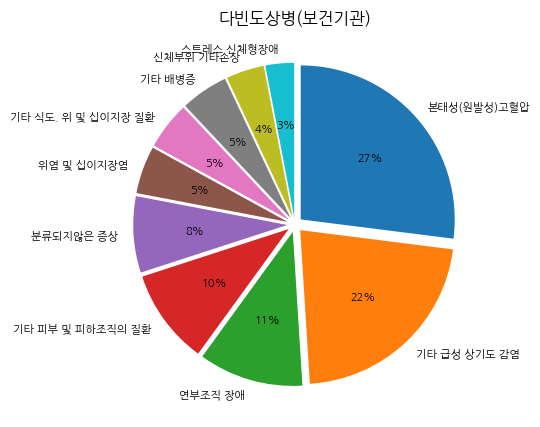

In [7]:
label =df['disease']
val = df['ratio']
explode = [0.05] * 10
plt.figure(figsize = (10, 5))
plt.title('다빈도상병(보건기관)')
plt.pie(val, labels = label, autopct = '%.f%%',textprops={'fontsize': 8},
        startangle = 90, counterclock = False,
        explode = explode)
plt.show()

In [8]:
df1=pd.read_csv('/content/시도별_다빈도_상병_급여현황외래_20231120121011.csv')
df1 = df1.rename(columns=df1.iloc[0])
df1 = df1.drop(df1.index[0])
df1 = df1.drop('시도별(1)', axis=1)
df1.columns = ['rank', 'disease', 'count']

In [9]:
df1['count'] = df1['count'].astype('int')
df1['count'].sum()
df1['ratio'] = (df1['count']/df1['count'].sum()*100).round(0)
df1.loc[9, 'disease'] = '분류되지않은 증상'

In [24]:
df1
df1 = df1.drop('ratio', axis=1)

In [16]:
df1.to_csv("outpatient_rank.csv")

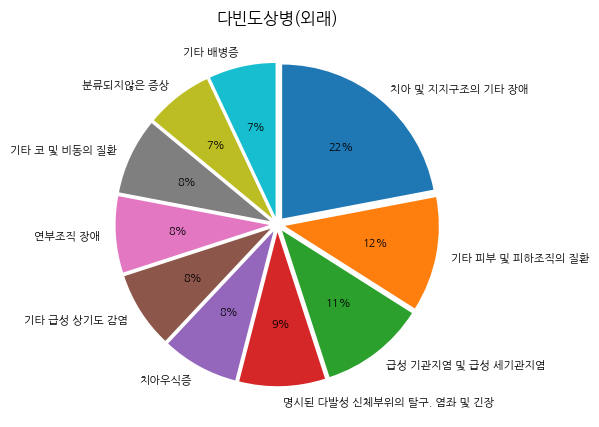

In [11]:
label =df1['disease']
val = df1['ratio']
explode = [0.05] * 10
plt.figure(figsize = (10, 5))
plt.title('다빈도상병(외래)')
plt.pie(val, labels = label, autopct = '%.f%%',textprops={'fontsize': 8},
        startangle = 90, counterclock = False,
        explode = explode)
plt.show()

In [12]:
df2=pd.read_csv('/content/시도별_다빈도_상병_급여현황입원_20231120121207.csv')
df2 = df2.rename(columns=df2.iloc[0])
df2 = df2.drop(df2.index[0])
df2 = df2.drop('시도별(1)', axis=1)
df2.columns = ['rank', 'disease', 'count']

In [13]:
df2['count'] = df2['count'].astype('int')
df2['count'].sum()
df2['ratio'] = (df2['count']/df2['count'].sum()*100).round(0)
df2.loc[3, 'disease'] = '분류되지않은 증상'

In [20]:
df2
df2 = df2.drop('ratio', axis=1)

In [21]:
df2

,rank,disease,count
1,1위,검사 및 조사를 위해 보건서비스와 접하고 있는 사람,3485
2,2위,출산장소에 따른 출생영아,3013
3,3위,분류되지않은 증상,2828
4,4위,감염성 기원이라고 추정되는 설사와 위장염,2449
5,5위,백내장 및 수정체의 기타 장애,2200
6,6위,기타 임신과 분만의 합병증,1787
7,7위,명시된 상세불명 및 다발성 신체부위의 기타 손상,1518
8,8위,기타 사지뼈의 골절,1433
9,9위,요추 및 기타 추간판장애,1421
10,10위,단일 자연분만,1302


In [15]:
df2.to_csv("hospitalize_rank.csv")

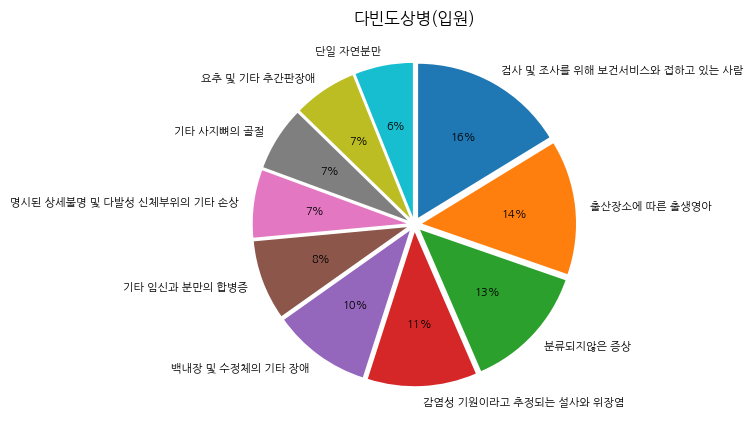

In [39]:
label =df2['disease']
val = df2['count']
explode = [0.05] * 10
plt.figure(figsize = (10, 5))
plt.title('다빈도상병(입원)')
plt.pie(val, labels = label, autopct = '%.f%%',textprops={'fontsize': 8},
        startangle = 90, counterclock = False,
        explode = explode)
plt.show()

In [25]:
df3=pd.concat([df1,df2], axis=1)

In [35]:
df3
df3.columns = ['rank_out', 'disease_out', 'count_out','rank_hos','disease_hos','count_hos']

In [36]:
df3

,rank_out,disease_out,count_out,rank_hos,disease_hos,count_hos
1,1위,치아 및 지지구조의 기타 장애,167378,1위,검사 및 조사를 위해 보건서비스와 접하고 있는 사람,3485
2,2위,기타 피부 및 피하조직의 질환,92455,2위,출산장소에 따른 출생영아,3013
3,3위,급성 기관지염 및 급성 세기관지염,82467,3위,분류되지않은 증상,2828
4,4위,명시된 다발성 신체부위의 탈구. 염좌 및 긴장,70288,4위,감염성 기원이라고 추정되는 설사와 위장염,2449
5,5위,치아우식증,62977,5위,백내장 및 수정체의 기타 장애,2200
6,6위,기타 급성 상기도 감염,59837,6위,기타 임신과 분만의 합병증,1787
7,7위,연부조직 장애,59268,7위,명시된 상세불명 및 다발성 신체부위의 기타 손상,1518
8,8위,기타 코 및 비동의 질환,57719,8위,기타 사지뼈의 골절,1433
9,9위,분류되지않은 증상,55423,9위,요추 및 기타 추간판장애,1421
10,10위,기타 배병증,49309,10위,단일 자연분만,1302


In [37]:
df3.to_csv("rank1.csv")